In [6]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *

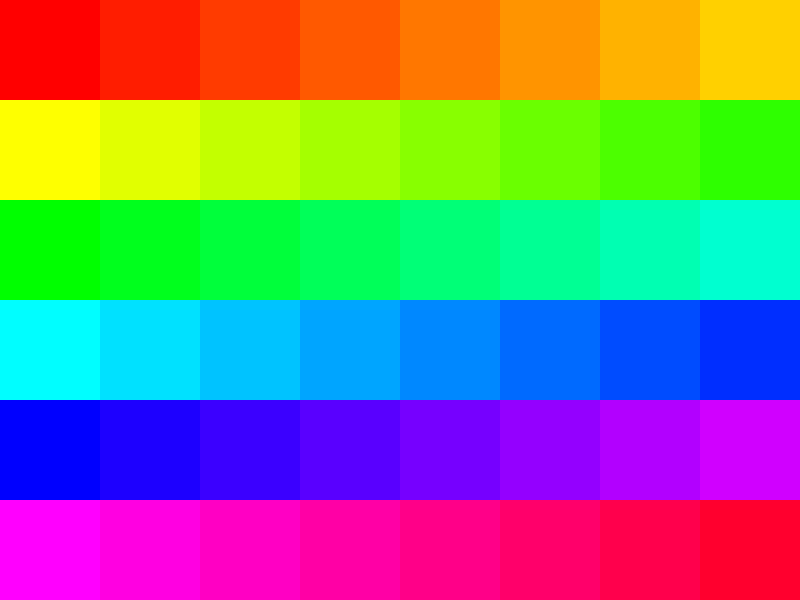

In [56]:
square_size = 100
rows, cols = 6, 8
rotate_amt = (360/rows)

img_width, img_height = square_size * cols, square_size * rows

image = Image.new('RGB', (img_width, img_height), 'white')
draw = ImageDraw.Draw(image)

def colors() -> list[Color]:
    colors = list[Color]()
    for row in range(rows):
        hue = row * rotate_amt
        for col in range(cols):
            new_hue = (rotate_amt // cols) * col
            color = Color(hue + new_hue, 100, 50)
            colors.append(color)
    return colors

for row in range(rows):
    hue = row * rotate_amt

    for col in range(cols):
        start_x = col * square_size
        start_y = row * square_size
        end_x = (1 + col) * square_size
        end_y = (1 + row) * square_size

        new_hue = (rotate_amt // cols) * col

        color = Color(hue + new_hue, 100, 50).as_rgb()

        draw.rectangle(
            [(start_x, start_y), (end_x, end_y)], color
        )

display(image)